# 1. Define project

Kaggle conducted an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The responses were cleaned and completed with 23,997 responses. In this project, I aimed to develop interesting stories by applying Seaborn and Plotly visualization libraries

# 2. Data exploration

In [1]:
# Import data
import pandas as pd
survey_df = pd.read_csv('kaggle_survey_2022_responses.csv')
survey_df.head()

C:\Users\17142\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [2]:
# Get unique question column
import re
unique_question_col = []
for x in list(survey_df.columns[1:]):
    if re.match('Q\d_1',x) and len(x) == 4:
        unique_question_col.append(x)
    if re.match('Q\d\d_1',x) and len(x) == 5:
        unique_question_col.append(x)
    if not re.search('_',x):
        unique_question_col.append(x)
print(unique_question_col)

['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q7_1', 'Q8', 'Q9', 'Q10_1', 'Q11', 'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16', 'Q17_1', 'Q18_1', 'Q19_1', 'Q20_1', 'Q21_1', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28_1', 'Q29', 'Q30', 'Q31_1', 'Q32', 'Q33_1', 'Q34_1', 'Q35_1', 'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1', 'Q41_1', 'Q42_1', 'Q43', 'Q44_1']


In [3]:
# Get all questions for review
pd.set_option('display.max_colwidth',None)
question_list = survey_df[unique_question_col].transpose()[[0]]

# set left alignment for all questions
question_list = question_list.style.set_properties(**{'text-align': 'left'})
question_list

,0
Q2,What is your age (# years)?
Q3,What is your gender? - Selected Choice
Q4,In which country do you currently reside?
Q5,"Are you currently a student? (high school, university, or graduate)"
Q6_1,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera
Q7_1,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - University courses
Q8,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q9,"Have you ever published any academic research (papers, preprints, conference proceedings, etc)?"
Q10_1,"Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)"
Q11,For how many years have you been writing code and/or programming?


In [4]:
# Get needed subset
survey_subset_df = survey_df.iloc[1:,1:]
survey_subset_df.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)",NaN,NaN,NaN,NaN,NaN
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums, etc)",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NaN,NaN,NaN,NaN
5,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya, etc)",NaN,NaN,NaN,NaN


In [5]:
def check_data(df):
    """
    Check number of unique values, duplicated values, missing values, data type
    Parameter
    ---------
    df: pandas data frame
    """
    print('Data shape' + str(df.shape))
    check_df = pd.DataFrame({'No. unique values':df.nunique(),
                             'No. duplicated values':df.duplicated().sum(),
                             'No. missing values':df.isnull().sum(),
                             'Data type':df.dtypes})
    return check_df
check_data_df = check_data(survey_subset_df)
check_data_df

Data shape(23997, 295)


,No. unique values,No. duplicated values,No. missing values,Data type
Q2,11,62,0,object
Q3,5,62,0,object
Q4,58,62,0,object
Q5,2,62,0,object
Q6_1,1,62,14298,object
...,...,...,...,...
Q44_8,1,62,16231,object
Q44_9,1,62,20193,object
Q44_10,1,62,22271,object
Q44_11,1,62,22729,object


## Analysis:
There are 44 questions and many of them are answered in multiple columns.There are 295 columns in total with many missing values, so it is difficult to find a common method to clean up data for all columns. The best approach is to create multiple subset data then process and analyze them seperately. In fact, there are a large number of insights we can extract from this data set. For this project, I will narrow the analysis to information that I personally feel interested as a graduate student who are looking to improve skills and change career path to a data scientist. Here are list of insights I like to explore:\
1/ What platforms are most helpful to start learning data science?\
2/ What tools are used on a regular basis?\
3/ What are top important daily activities that a data science carry out for their job?\
4/ How is yearly compensation (approximate USD) distributed in different countries, industries and genders?\

# 3. Data processing and analysis

## 3.1. What platforms are most helpful to start learning data science?

In [6]:
# Extract related columns question 6
platform = [x for x in list(survey_df.columns[1:]) if re.match('Q6_',x)]
print(platform)

['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12']


In [7]:
# Get subset data of Q6
platform_df = survey_df[platform]
platform_df.head()

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
0,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university degree),NaN,NaN
3,Coursera,edX,NaN,DataCamp,NaN,Udacity,Udemy,LinkedIn Learning,NaN,University Courses (resulting in a university degree),NaN,NaN
4,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other


In [8]:
# Extract the platform value from each question
platform_name = [sen.split('-')[-1].strip() for sen in platform_df.iloc[0,:]]

Text(0.5, 0, 'Number of users')

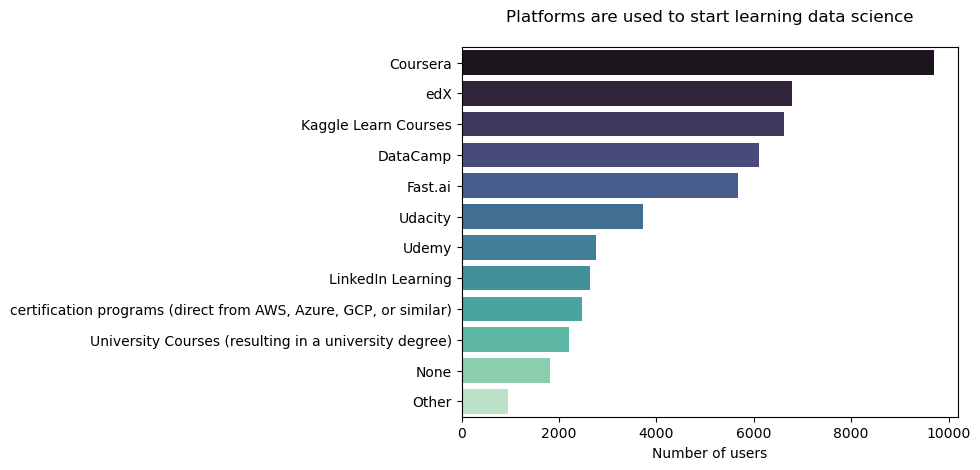

In [9]:
# Visualize the platform 
import seaborn as sns
import matplotlib.pyplot as plt
platform_count = platform_df.iloc[1:,:].count().sort_values(ascending=False)
sns.barplot(y=platform_name, x=platform_count.values, palette = 'mako')
plt.title('Platforms are used to start learning data science\n')
plt.xlabel('Number of users')

## 3.2. What tools are used on a regular basis?

I will create similar bar charts as the part 3.1 for multiple questions. So it will be faster to create a def function to perform this section. This part is related to following questions:\
12. What programming languages do you use on a regular basis?\
13. Which of the following integrated development environments (IDE's) do you use on a regular basis?\
15. Do you use any of the following data visualization libraries on a regular basis?\
18. Which of the following ML algorithms do you use on a regular basis?\
20. Which of the following natural language processing (NLP) methods do you use on a regular basis?\
36. Do you use any of the following business intelligence tools?

In [10]:
def viz_bar(col, _title, _xlabel, _palette):
    """
    Create a bar charts for a particular question in the data set
    
    Parameters
    ----------
    col: column initial letters we want to subset (str)
    _title: title of the chart (str)
    _xlabel: label of x axis (str)
    _palette: color palette we want to use (str)    
    """
    select_col = [x for x in list(survey_df.columns[1:]) if re.match(col,x)]
    select_df = survey_df[select_col]
    select_col_name = [sen.split('-')[-1].strip() for sen in select_df.iloc[0,:]]
    Select_col_count = select_df.iloc[1:,:].count().sort_values(ascending=False)
    sns.barplot(x=Select_col_count.values, y=select_col_name, palette = _palette)
    plt.title(_title)
    plt.xlabel(_xlabel)

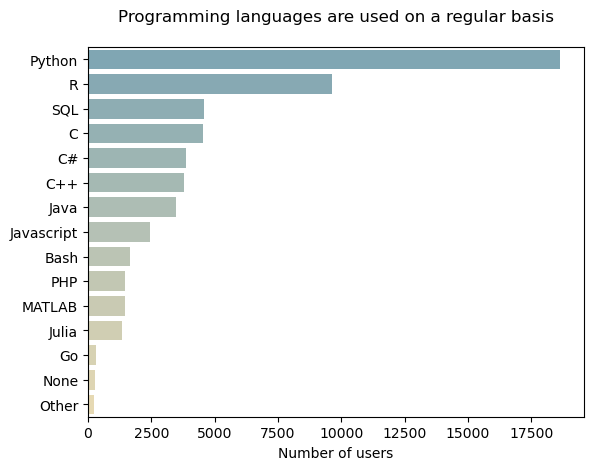

In [11]:
viz_bar('Q12_', 'Programming languages are used on a regular basis\n', 'Number of users', 'blend:#7AB,#EDA')

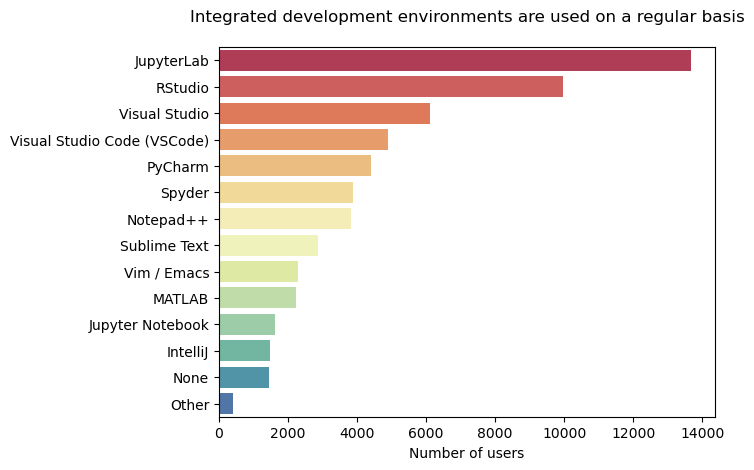

In [12]:
viz_bar('Q13_', 'Integrated development environments are used on a regular basis\n', 'Number of users', 'Spectral')

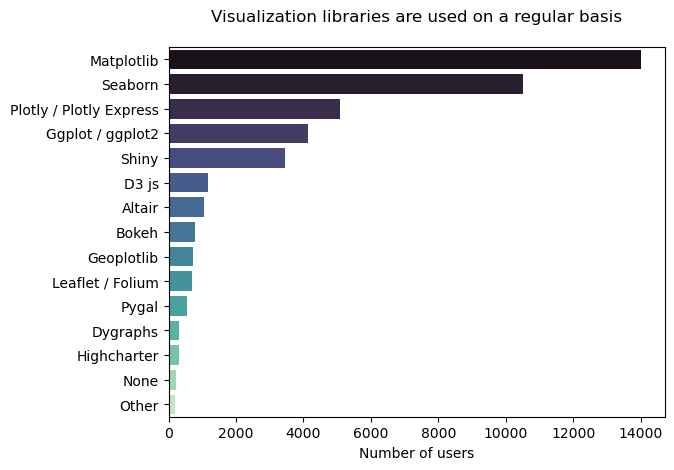

In [13]:
viz_bar('Q15_', 'Visualization libraries are used on a regular basis\n', 'Number of users', 'mako')

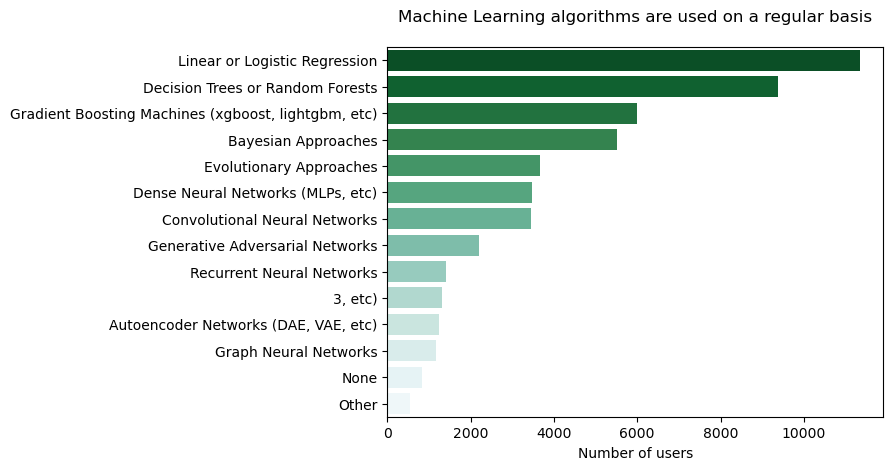

In [14]:
viz_bar('Q18_', 'Machine Learning algorithms are used on a regular basis\n', 'Number of users', 'BuGn_r')

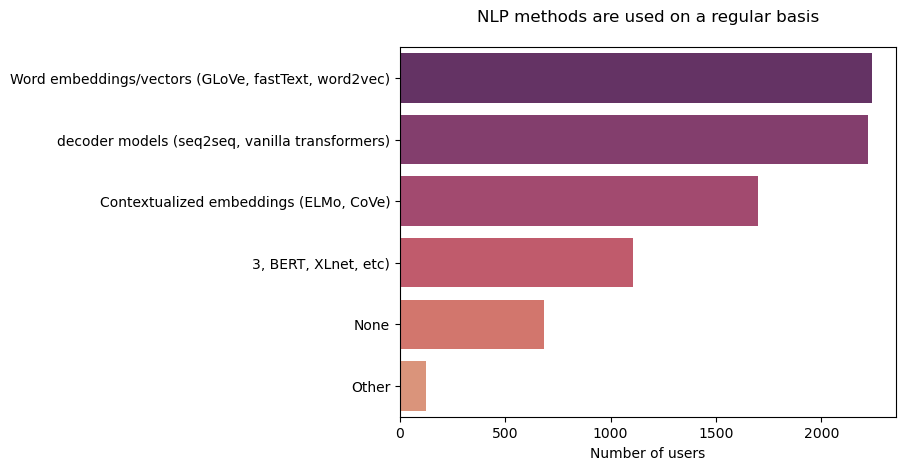

In [15]:
viz_bar('Q20_', 'NLP methods are used on a regular basis\n', 'Number of users', 'flare_r')

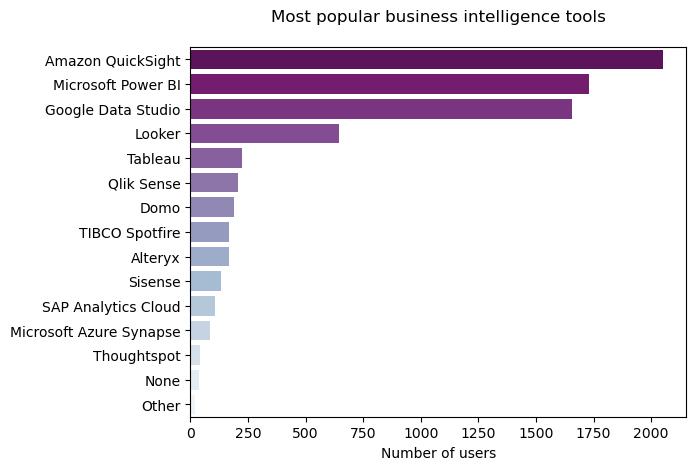

In [16]:
viz_bar('Q36_', 'Most popular business intelligence tools\n', 'Number of users', 'BuPu_r')

# 3.3. What are top important daily activities that a data science carry out for their job?

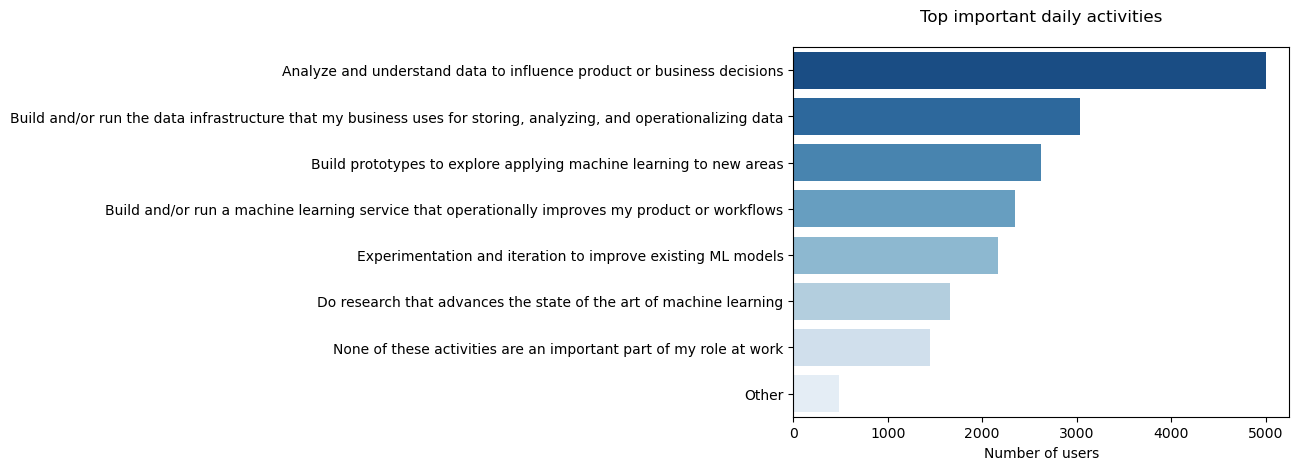

In [17]:
viz_bar('Q28_', 'Top important daily activities\n', 'Number of users', 'Blues_r')

# 3.4. Salary analysis

In [18]:
# Copy data
salary_df = survey_df.copy(deep=True)

In [19]:
# Inspect salary column
print(check_data_df.loc['Q29',:])
salary_df.Q29[1:].value_counts()

No. unique values            26
No. duplicated values        62
No. missing values        15861
Data type                object
Name: Q29, dtype: object


$0-999              1112
10,000-14,999        493
30,000-39,999        464
1,000-1,999          444
40,000-49,999        421
100,000-124,999      404
5,000-7,499          391
50,000-59,999        366
7,500-9,999          362
150,000-199,999      342
20,000-24,999        337
60,000-69,999        318
15,000-19,999        299
70,000-79,999        289
25,000-29,999        277
2,000-2,999          271
125,000-149,999      269
3,000-3,999          244
4,000-4,999          234
80,000-89,999        222
90,000-99,999        197
200,000-249,999      155
250,000-299,999       78
300,000-499,999       76
$500,000-999,999      48
>$1,000,000           23
Name: Q29, dtype: int64

I will change all range value to an average value for better visualization purpose.

In [20]:
# Create a function to change range to an average value
def salary_range_to_avg(_range):
    if _range == '$0-999':
        avg = 500
    elif _range == '>$1,000,000':
        avg = 1000000
    elif re.search(',',_range):
        _range = _range.replace(',','')
        _range = _range.replace('$','')
        range_list = [int(x) for x in _range.split('-')]
        avg = round(sum(range_list)/len(range_list),0)
    else:
        range_list = [int(x) for x in _range.split('-')]
        avg = round(sum(range_list)/len(range_list),0)
    return avg

In [21]:
# Apply function to column Q29 (annual salary)
for i in range(1,len(salary_df)):
    if pd.isna(salary_df.Q29[i]):
        pass
    else:
        salary_df.Q29[i] = salary_range_to_avg(salary_df.Q29[i])

In [22]:
# Check the result
salary_df.Q29.value_counts()

500                                                             1112
12500.0                                                          493
35000.0                                                          464
1500.0                                                           444
45000.0                                                          421
112500.0                                                         404
6250.0                                                           391
55000.0                                                          366
8750.0                                                           362
175000.0                                                         342
22500.0                                                          337
65000.0                                                          318
17500.0                                                          299
75000.0                                                          289
27500.0                           

## Visualize salary across countries, gender

In [23]:
# Extract needed columns
country_salary_df = salary_df[['Q3','Q4','Q24','Q29']][1:].dropna(how='any').reset_index()
country_salary_df.drop('index',axis=1, inplace=True)
country_salary_df.head()

,Q3,Q4,Q24,Q29
0,Man,France,Online Service/Internet-based Services,27500.0
1,Man,Germany,Insurance/Risk Assessment,112500.0
2,Man,Australia,Government/Public Service,112500.0
3,Man,United States of America,Computers/Technology,225000.0
4,Man,United States of America,Computers/Technology,225000.0


In [24]:
# Inspect country attribute
country_salary_df.Q4.unique()

array(['France', 'Germany', 'Australia', 'United States of America',
       'Singapore', 'Italy', 'Taiwan', 'Brazil', 'Argentina', 'Chile',
       'Other', 'Japan', 'Canada', 'Indonesia', 'India', 'Colombia',
       'Pakistan', 'Mexico', 'Turkey', 'Spain', 'Cameroon', 'Nigeria',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'Tunisia', 'Philippines', 'Egypt', 'South Korea', 'Peru',
       'Thailand', 'Iran, Islamic Republic of...', 'Netherlands', 'Ghana',
       'Portugal', 'Russia', 'Viet Nam', 'Poland', 'Saudi Arabia',
       'Bangladesh', 'Czech Republic', 'Israel', 'China', 'Sri Lanka',
       'South Africa', 'Hong Kong (S.A.R.)', 'Kenya', 'Romania',
       'Morocco', 'Ukraine', 'United Arab Emirates', 'Nepal', 'Belgium',
       'Malaysia', 'Ecuador', 'I do not wish to disclose my location',
       'Algeria', 'Zimbabwe', 'Ireland'], dtype=object)

Since there are so many countries in the dataset, I will only choose 'United States of America', 'India', 'South Korea', 'China', 'Taiwan'. They are countries where most of students in our program come from, so I am interested in sharing my findings with them.

C:\Users\17142\AppData\Local\Temp\ipykernel_3472\3364210105.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


[Text(-200000.0, 0, '-200K'),
 Text(0.0, 0, '0K'),
 Text(200000.0, 0, '200K'),
 Text(400000.0, 0, '400K'),
 Text(600000.0, 0, '600K'),
 Text(800000.0, 0, '800K'),
 Text(1000000.0, 0, '1,000K'),
 Text(1200000.0, 0, '1,200K')]

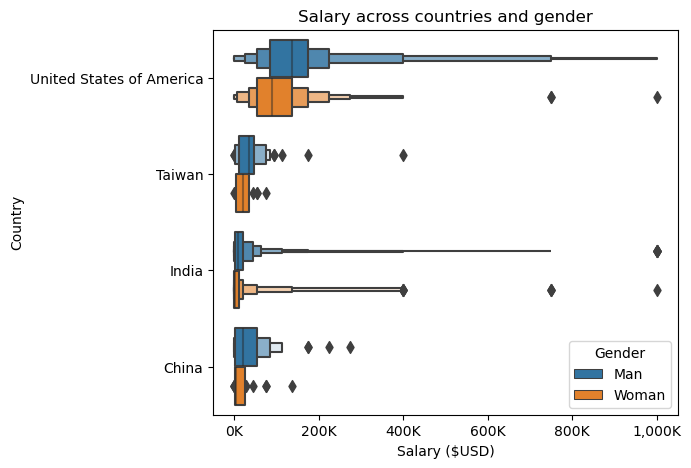

In [25]:
# Visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))

# Choose some interesting countries
select_country = ['United States of America', 'India', 'China', 'Taiwan']
select_country_df = country_salary_df[country_salary_df.Q4.isin(select_country)]

# Generate boxplot
g = sns.boxenplot(data=select_country_df[select_country_df.Q3.isin(['Man','Woman'])], x='Q29', y='Q4', hue='Q3')
plt.title('Salary across countries and gender')
plt.xlabel('Salary ($USD)')
plt.ylabel('Country')
plt.legend(title='Gender')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

#### Analysis:
* Man earn higher than woman in all countries. 
* Salary in the US is the highest. US is also the most popular country in terms of the number of data science professionals.
* A small number of data science professions earn extremely high salary. If I use it to develop model, I will need to remove these outliers.

## Salary according to industry and gender in different countries

In [26]:
# Extract subset of needed data. Rename the columns for plot visualization purpose
country_salary_df_name = country_salary_df.rename({'Q3':'Gender','Q4':'Country','Q24':'Industry','Q29':'Salary_USD'},axis=1)
country_salary_df_name = country_salary_df_name[country_salary_df_name.Gender.isin(['Man','Woman'])]
country_salary_df_name.head()

,Gender,Country,Industry,Salary_USD
0,Man,France,Online Service/Internet-based Services,27500.0
1,Man,Germany,Insurance/Risk Assessment,112500.0
2,Man,Australia,Government/Public Service,112500.0
3,Man,United States of America,Computers/Technology,225000.0
4,Man,United States of America,Computers/Technology,225000.0


In [27]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


Github performs a static render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly graph. To generate Plotly chart, I will export it to a png file and show it with IPython.display. There are multiple approaches to fix this problem and I think it is the most straight-forward method.

In [28]:
# Install Kaleido to write the plot to an image with "fig.write_image" function in the next step
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Visualize with Pyplot
import plotly.express as px
country_salary_df_select_country = country_salary_df_name[country_salary_df_name.Country.isin(select_country)]
fig = px.treemap(country_salary_df_select_country,\
                 path=[px.Constant("Salary across different countries, industries, and gender"), 'Country','Industry','Gender'],\
                 values='Salary_USD', color='Industry',\
                 color_discrete_map={'(?)':'lightgrey'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

# Write the image file
fig.write_image("country_industry_salary.png")

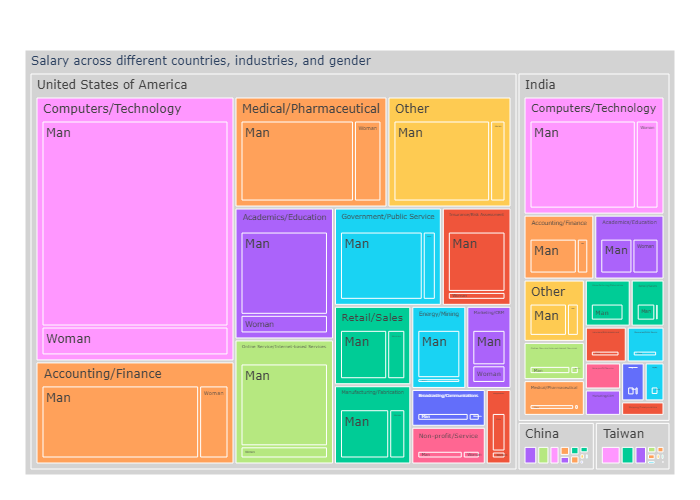

In [39]:
# Display the image
from IPython.display import Image
Image(filename='country_industry_salary.png')

#### Analysis:
* A huge difference in salaries across different countries. Salary of data science in the US is the highest among selected countries. If we take a closer look on salary in all countries, the US still offers the most competitive salary.
* Regarding the number of data science professionals, the US and India have the most popular countries. 
* Male earn a higher salary than female and the number of male data science professionals is also higher than woman in all industries and countries.
* Salary is also subject to industry. Top 3 high-paying industries are Computers/Technology, Accounting/Finance, Medical/Pharmaceutical.

## Salary according to job title and size of the company

In [30]:
# Extract needed subset data
title_size_salary_df = salary_df[['Q23','Q25','Q29']][1:].dropna(how='any').reset_index()
title_size_salary_df.drop('index',axis=1, inplace=True)
title_size_salary_df = title_size_salary_df.rename({'Q23':'Job title','Q25':'Company size','Q29':'Salary_USD'},axis=1)
title_size_salary_df.head()

,Job title,Company size,Salary_USD
0,Data Scientist,0-49 employees,27500.0
1,Software Engineer,250-999 employees,112500.0
2,Research Scientist,"1000-9,999 employees",112500.0
3,Developer Advocate,"1000-9,999 employees",225000.0
4,Data Scientist,"1000-9,999 employees",225000.0


In [31]:
# Change Salary_USD to numeric
title_size_salary_df.Salary_USD = pd.to_numeric(title_size_salary_df.Salary_USD)
title_size_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Job title     8136 non-null   object 
 1   Company size  8136 non-null   object 
 2   Salary_USD    8136 non-null   float64
dtypes: float64(1), object(2)
memory usage: 190.8+ KB


In [32]:
# Take the average of the salary based on each title and company size
title_size_salary_group = title_size_salary_df.groupby(['Job title','Company size']).mean().reset_index()
title_size_salary_group.rename({'Salary_USD':'Avg_Salary_USD'}, axis=1, inplace=True)
title_size_salary_group.head()

,Job title,Company size,Avg_Salary_USD
0,Data Administrator,0-49 employees,8250.000000
1,Data Administrator,"10,000 or more employees",25416.666667
2,Data Administrator,"1000-9,999 employees",33000.000000
3,Data Administrator,250-999 employees,27710.526316
4,Data Administrator,50-249 employees,15227.272727


In [40]:
# Visualize
import plotly.express as px
fig = px.treemap(title_size_salary_group,\
                 path=[px.Constant("Average salary based on title and the size of company"), 'Job title','Company size'],\
                 values='Avg_Salary_USD', color='Job title',\
                 color_discrete_map={'(?)':'lightgrey'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

# Write the image file
fig.write_image("title_size_salary.png")

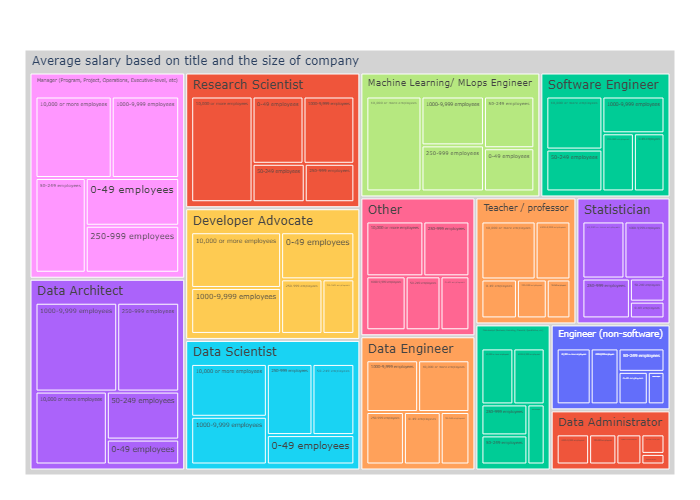

In [41]:
# Display the image
Image(filename='title_size_salary.png')

#### Analysis:
* Manager (Program, Project, Operations, Executive-level, etc), Data Architect, and Research Scientist have the highest average salary.
* Data Administrator, Engineer (non-software) and Teacher/Professor are the least among data science professionals.
* Bigger company sizes likely offer a higher salary.